## **Image Classification using Tensorflow and Keras**

**This is a Neural Network Model to classify images of clothing like sneakers and shirts. This notebook uses tf.keras, a high level API to build and train Models in Tensorflow**

**Contents**


1.   Import the Fashion MNIST Dataset.
2.   Explore the Dataset.
3.   Preprocess the Data.
4.   Build a Model.
          *   Set up Layers of Neural Network
          *   Compile the Model
5.   Train the Model
          *   Feed the Model
          *   Evaluate Accuracy
          *   Make Predictions
          *   Verify Predictions
6.   Use the trained model to Predict.







In [40]:
# tensorflow and tf.keras
import tensorflow as tf

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [41]:
print(tf.__version__)

2.4.1


**1. Import Fashion MNIST Dataset**
+ This Dataset Contains 70,000 greyscale images in 10 categories.
+ Each Image shows individual articles of clothing at low resolution (28*28 pixels)
+ Here, 60,000 images are used to train the network and 10,000 to evaluate how accurately the network learned to classify images.

In [43]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

Loading dataset return 4 Numpy arrays
+ train_images & train_labels which are training set used to train the network
+ test_images & test_labels which are test set used to test the model.

+ Images are 28*28 numpy arrays with pixel values ranging from 0 to 255.
+ The labels are an array of integers ranging from 0 to 9


Each image is mapped to single label







In [44]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

**2. Explore Dataset**

Explore the Dataset before training the data.

In [45]:
train_images.shape

(60000, 28, 28)

In [46]:
train_labels.shape

(60000,)

In [48]:
test_images.shape

(10000, 28, 28)

In [47]:
test_labels.shape

(10000,)

**3. Preprocess Data**
+ Data must be preprocessed before training the network. 
+ Inspect the first image in the training set and see the pixel value.

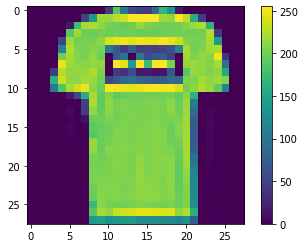

In [49]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Scale the value to a range of 0 to 1 before feeding them into Neural Network model.

In [50]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Verify the data is in correct format by displaying 25 images from the training set.


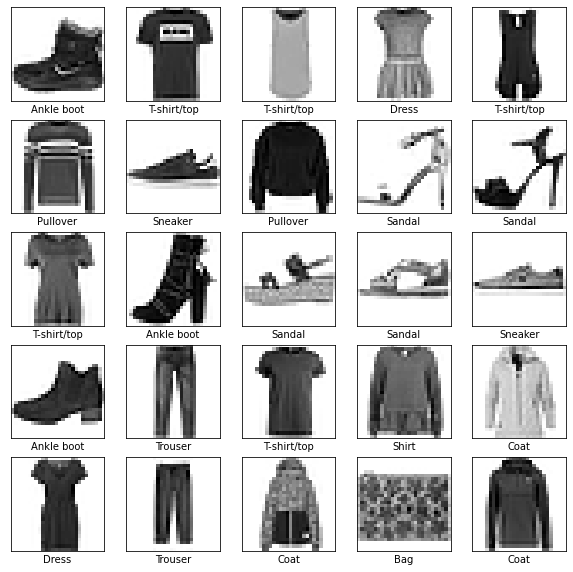

In [51]:
plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

**4. Build Model**
+ **1. Setup the Layers**

+ The Basic Building Block of Neural Networks is Layers.
+ Layers extracts representation from data fed into them.
+ Most Deep Learning Problems consists of chaining together single layers.
+ Most layers have parameters that are learned duirng the training process.

In [52]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape = (28,28)),
                            tf.keras.layers.Dense(128, activation = "relu"),
                            tf.keras.layers.Dense(10)
])

+ First layer in this Network (Flatten) transform the format of images from 2D array (28x28) to 1D (28x28 = 784).

+ This layer will unstack the pixel and line them up.
+ This layer has no parameter to learn. it only reformats the data.

+ There are two Dense Layer. (Densely Connected) and (Fully Connected).
+ The first Dense layer has 128 nodes (neuron)
+ 2nd layer returns a logits array with length of 10
+ Each node contain a score that indicates the current image belongs to one of 10 classes.

**2. Compile the Model**
+ Compiling is the setting up of the Model. These are added during the Compile steps.



1.   **Loss Function** : This measures how accurate the model is during training. ie minimize the  loss function to steer your model in the right direction.
2.   **Optimizer** : This is how the model is updated based on the data it sees and its loss function.
3. **Metrics** : Used to monitor training and test steps. Here we use "accuracy", the fraction of images that correctly classifies.



In [53]:
model.compile(optimizer="rmsprop",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

**5. Train the Model**


Training Neural Networks requires following Steps

1. Feed the training data to the Model
2. The Model learns to associate images and labels
3. Make predictions about the test set,
4. Verify that predicts match the labels the array.

**1. Feed the Model**

In [54]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6343 - accuracy: 0.7769
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3432 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3314 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3146 - accuracy: 0.8877
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.8937
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.8964
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2899 - accuracy: 0.8988
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797 - accuracy: 0.9028
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.277

So as the Model trains the loss and accuracy metrics are displayed. The Model reaches an accuracy about 0.91 on the training data. 

**2. Evaluate the Model**

+ Check how the Model Perfoms on the test data.

In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy:", test_acc)

313/313 - 0s - loss: 0.4520 - accuracy: 0.8714

Test Accuracy: 0.871399998664856


+ Test accuracy is less than training accuracy.
+ The gap between these to accuracies is called overfitting.

+ Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data.

+ An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

**3. Make Predictions**

Now Make Predictions about some Image.
+ The model's linear outputs logits
+ Attach a softmax layer to convert the logits to probabilities.

In [56]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [57]:
predictions = probability_model.predict(test_images)

First Prediction

In [58]:
predictions[0]

array([4.6638058e-11, 2.0748611e-17, 4.0313039e-14, 6.0083528e-11,
       4.4043455e-16, 2.7205171e-05, 1.3294109e-10, 6.1402444e-02,
       3.4148806e-07, 9.3856996e-01], dtype=float32)

Prediction is an array of 10 numbers. They represents the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

+ See which label has the highest confidence value.

In [59]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_name[9]

Now, Examine the test_labels shows that this classification id correct.

In [60]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [61]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**4. Verify Predictions**

+ Correct Prediction labels are blue and Incorrect will be Red.
+ Number gives the Percentage of the Predicted label.

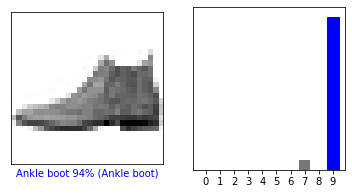

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

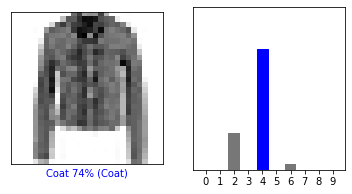

In [63]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Several Images with their Predictions

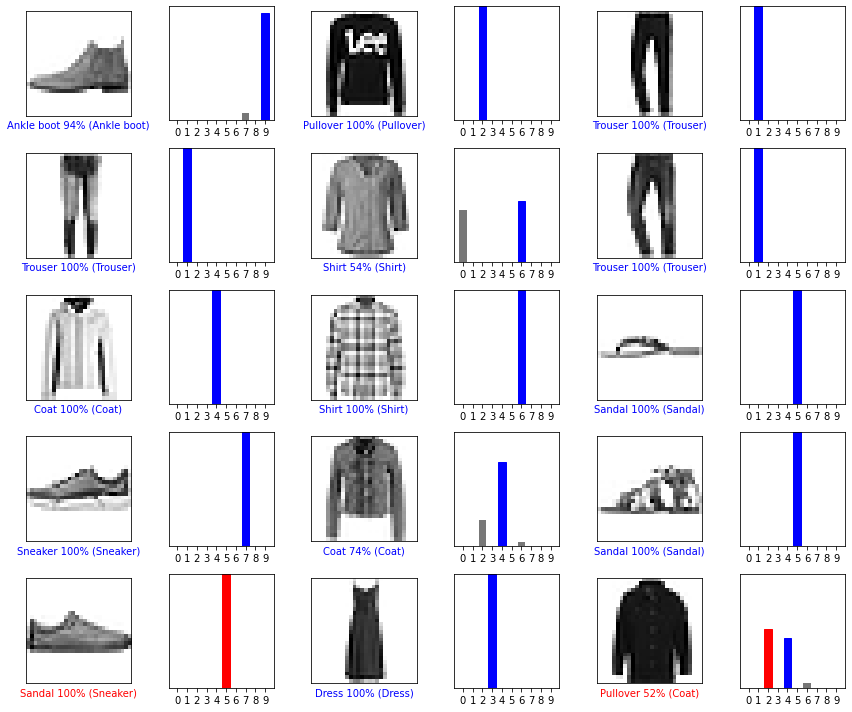

In [64]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**6. Use Trained Model**
+ Use trained model to make prediction about single image from test set.

In [65]:
img = test_images[1]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list

In [66]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image

In [67]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.4152801e-10 1.5314259e-23 9.9999475e-01 8.1273311e-15 9.8809824e-07
  6.1369813e-16 4.2685829e-06 4.0531658e-27 9.6941253e-17 2.2369574e-16]]


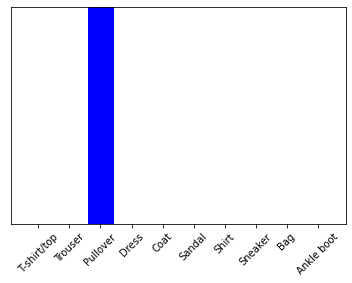

In [68]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch

In [69]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.